In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162993 sha256=95db5f7b8c81e357c01df56388e102fd4bb8ba711704a4c609f5437b22f3f089
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import KNNWithMeans, dump,KNNBasic,KNNWithZScore,Dataset,accuracy,Reader,SVD, SVDpp, NMF,accuracy,CoClustering

Data pre-processing

In [ ]:
#dataframe = pd.read_json("D:/Program Files/Google/Chrome/Application/New folder (2)/Sports_and_Outdoors_5.json")
#dataframe.to_csv('reviews.csv', sep=',', index=False)

In [ ]:
#sports_data = pd.read_csv("/home/user/folder1/reviews.csv")

In [ ]:
#sports_data.head()

In [ ]:
#new_df=sports_data.groupby("asin").filter(lambda x:x['overall'].count() >=50)

In [ ]:
#len(new_df)

In [ ]:
#new_df = sports_data.sample(frac=0.01, replace=True, random_state=1)

In [ ]:
#len(new_df)

In [ ]:
#new_df = new_df[['reviewerID','asin','overall']]

In [ ]:
#new_df.head()

In [ ]:
#new_df.rename(columns = {'reviewerID':'UserID','asin':'ProductID','overall':'Rating'}, inplace = True)

In [ ]:
#new_df.head()

In [ ]:
#new_df.to_csv("/home/user/folder1/reviews_count_50.csv")

Reading data

In [5]:
new_df = pd.read_csv("/content/reviews_count_50.csv")

In [6]:
new_df = new_df[['UserID','ProductID','Rating']]

In [7]:
new_df.head()

,UserID,ProductID,Rating
0,A3QZIJP6TD6YNM,B000ENQRCI,5
1,A2EAV3BC6HQC8S,B000YRU4NM,5
2,A2M6VNZ7Q9ELRK,B001T7F49K,5
3,A2SRV8J3XK8DDX,B000YQNL1U,4
4,A24FJ2J6GJJTJ0,B0028M0YTU,5


In [8]:
new_df.describe()

,Rating
count,28399.000000
mean,4.410789
std,1.031201
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
#new_df = new_df.sample(frac=0.25, replace=True, random_state=1)

In [9]:
new_df.head()

,UserID,ProductID,Rating
0,A3QZIJP6TD6YNM,B000ENQRCI,5
1,A2EAV3BC6HQC8S,B000YRU4NM,5
2,A2M6VNZ7Q9ELRK,B001T7F49K,5
3,A2SRV8J3XK8DDX,B000YQNL1U,4
4,A24FJ2J6GJJTJ0,B0028M0YTU,5


In [10]:
len(new_df)

28399

In [11]:
len(new_df.UserID.unique())

26649

In [12]:
len(new_df.ProductID.unique())

18561

In [13]:
new_df.Rating.unique()

array([5, 4, 3, 1, 2])

In [14]:
print("Total no of ratings:",new_df.shape[0])
print("No. of unique users:", new_df["UserID"].nunique())
print("No. of unique products:", new_df["ProductID"].nunique())

Total no of ratings: 28399
No. of unique users: 26649
No. of unique products: 18561


In [15]:
ratings_per_user = new_df.groupby(by='UserID')['Rating'].count()
ratings_per_user.describe()

count    26649.000000
mean         1.065669
std          0.273483
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Rating, dtype: float64

Minimum number of product ratings given by a user: 1

Maximum number of product ratings given by a user: 5

In [16]:
ratings_per_product = new_df.groupby(by='ProductID')['Rating'].count()
ratings_per_product.describe()

count    18561.000000
mean         1.530036
std          1.569467
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         43.000000
Name: Rating, dtype: float64

Minimum number of user ratings for a product: 1

Maximum number of user ratings for a product: 43

In [17]:
sns.set(style="darkgrid")
sns.set_palette("Set2")

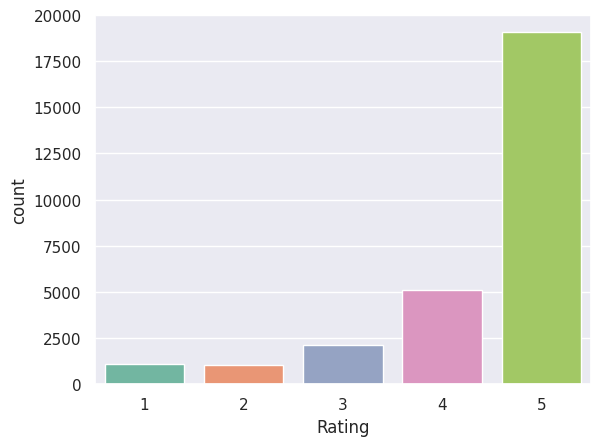

In [ ]:
ax = sns.countplot(x="Rating", data=new_df)

In [18]:
new_df['Rating'].value_counts()

Rating
5    19067
4     5112
3     2119
1     1080
2     1021
Name: count, dtype: int64

Splitting data into train and test sets

In [19]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[["UserID", "ProductID", "Rating"]],reader)

In [25]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

Neural Matrix Factorization

In [20]:
param_grid = {"reg_pu": [0.02, 0.04,0.06,0.08], "reg_qi": [0.02, 0.04,0.06,0.08],"random_state":[10]}
gs = GridSearchCV(NMF, param_grid, measures=["rmse"],cv=3)

In [21]:
gs.fit(data)

In [22]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.053422945373359
{'reg_pu': 0.08, 'reg_qi': 0.08, 'random_state': 10}


In [26]:
nmf_model = NMF(reg_pu=0.08,reg_qi=0.08,random_state = 10)
nmf_model.fit(trainset)

In [27]:
test_pred = nmf_model.test(testset)

In [28]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0455


1.0454744250926917

In [29]:
#for prediction in test_pred[0:20]:
#    print(prediction)

In [30]:
#uids = [pred.uid for pred in test_pred]

In [31]:
#users=list(set(uids))
#print(users[0:5])

K Nearest Neighbours

In [32]:
param_grid = {"sim_options": {"name": ['msd','cosine','pearson','pearson_baseline']},"random_state":[10]}
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse"],cv=3)

In [33]:
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done 

In [34]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0270095236312085
{'sim_options': {'name': 'pearson', 'user_based': True}, 'random_state': 10}


In [35]:
knn_model = KNNBasic(sim_options={'name':'pearson'},verbose = False,random_state=10)
knn_model.fit(trainset)

In [36]:
test_pred = knn_model.test(testset)

In [37]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0176


1.0176464704728356

KNN with means

In [38]:
param_grid = {"sim_options": {"name": ['msd','cosine','pearson','pearson_baseline']},"random_state":[10]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse"],cv=3)

In [39]:
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done 

In [40]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0349935434681965
{'sim_options': {'name': 'pearson', 'user_based': True}, 'random_state': 10}


In [41]:
algo = KNNWithMeans(sim_options={'name': 'pearson'},random_state=10)
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [42]:
test_pred = algo.test(testset)

In [43]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0272


1.0271867847828877

KNN With Z score

In [44]:
param_grid = {"sim_options": {"name": ['msd','cosine','pearson','pearson_baseline']},"random_state":[10]}
gs = GridSearchCV(KNNWithZScore, param_grid, measures=["rmse"],cv=3)

In [45]:
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done 

In [46]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0371234882611815
{'sim_options': {'name': 'pearson', 'user_based': True}, 'random_state': 10}


In [47]:
algo = KNNWithZScore(sim_options={'name': 'pearson'},random_state=10)
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [48]:
test_pred = algo.test(testset)

In [49]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0272


1.0271867847828877

Co Clustering

In [50]:
param_grid = {"n_cltr_u": [2,3,4,5], "n_cltr_i": [2,3,4,5],"random_state":[10]}
gs = GridSearchCV(CoClustering, param_grid, measures=["rmse"],cv=3)

In [51]:
gs.fit(data)

In [52]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0334218922229421
{'n_cltr_u': 5, 'n_cltr_i': 5, 'random_state': 10}


In [53]:
algo = CoClustering(n_cltr_u=5,n_cltr_i=3,random_state=10)
algo.fit(trainset)

In [54]:
test_pred = algo.test(testset)

In [55]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0360


1.036014700848183

Singular Value Decomposition (SVD)

In [56]:
param_grid = {"reg_all": [0.02, 0.04,0.06,0.08], "lr_all": [0.002, 0.003,0.005,0.007],"random_state":[10]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse"],cv=3)

In [57]:
gs.fit(data)

In [58]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.024887368829949
{'reg_all': 0.08, 'lr_all': 0.007, 'random_state': 10}


In [59]:
svd_model = SVD(reg_all=0.06,lr_all=0.007,random_state = 10)
svd_model.fit(trainset)

In [60]:
test_pred = svd_model.test(testset)

In [61]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0144


1.0144019022519453

Singular Value Decomposition ++ (SVDpp)

In [62]:
param_grid = {"reg_all": [0.02, 0.04,0.06,0.08], "lr_all": [0.005, 0.007,0.009,0.011],"random_state":[10]}
gs = GridSearchCV(SVDpp, param_grid, measures=["rmse"],cv=3)

In [63]:
gs.fit(data)

In [64]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0247595610466107
{'reg_all': 0.08, 'lr_all': 0.007, 'random_state': 10}


In [65]:
svd_model = SVDpp(reg_all=0.08,lr_all=0.009,random_state = 10)
svd_model.fit(trainset)

In [66]:
test_pred = svd_model.test(testset)

In [67]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0147


1.0147485839731631

NMF:train:1.0510  test:1.0455

KNNBasic: train:1.0275  test:1.0176

KNNWithMeans: train:1.0341 test:1.0272

KNNZscore: train:1.0360  test:1.0272

Co Clustering: train:1.0355  test:1.0360

SVD: train:1.0241  test:1.0144

SVDpp : train:1.0248  test:1.0147

SVD gives the best results.

Building the final recommender model

In [68]:
svd_model = SVD(reg_all=0.06,lr_all=0.007,random_state = 10)
svd_model.fit(trainset)

In [69]:
test_pred = svd_model.test(testset)

In [70]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.0144


1.0144019022519453

In [71]:
for prediction in test_pred[0:10]:
    print(prediction)

user: A2CUIBSXNS741L item: B000YBAKU0 r_ui = 5.00   est = 4.68   {'was_impossible': False}
user: A1LE6ISJQOHPZZ item: B0029LIY3I r_ui = 5.00   est = 4.41   {'was_impossible': False}
user: A19K74GRYPPOSX item: B00X6ZKQA0 r_ui = 5.00   est = 4.55   {'was_impossible': False}
user: AEDFCPZUEJUR6 item: B00FM4DK56 r_ui = 5.00   est = 4.53   {'was_impossible': False}
user: A29HMA1ATAK4MB item: B0007NX8SQ r_ui = 5.00   est = 4.41   {'was_impossible': False}
user: A1X2HZLCG72UGC item: B00ARA5NLO r_ui = 5.00   est = 4.41   {'was_impossible': False}
user: A3L247IF1OZ2I item: B001F4YUV0 r_ui = 5.00   est = 4.41   {'was_impossible': False}
user: A1BAAUSM4IL1XP item: B00HUC2VO4 r_ui = 3.00   est = 4.41   {'was_impossible': False}
user: ABP2GYZPSW3P8 item: B000EBKJME r_ui = 3.00   est = 4.41   {'was_impossible': False}
user: AJPQUA1WRC86A item: B000BTNLVK r_ui = 5.00   est = 4.54   {'was_impossible': False}


In [72]:
uids = [pred.uid for pred in test_pred]

In [73]:
users=list(set(uids))
print(users[0:5])

['A1UY9L5ZNGEWP6', 'AMTUXMEXH8Y9G', 'A2OLCB0ZSYAX1P', 'A3K083KS472GH0', 'A3UOYORBGUQGI4']


In [74]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    # Map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [75]:
top_n = get_top_n(test_pred, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Streaming output truncated to the last 5000 lines.
A303S36GXJ7O65 ['B00RLT3UJ6']
A1179EHF2DRG55 ['B0050LUBZ8']
A1FXUM9AT4KJI3 ['B00NH06V2G']
A1MNQ37YK44ZLG ['B00EMG5O04']
A2JAY9HR3LEGG ['B004LFT4CA']
A3LUQQIIA1TK0C ['B0083CMKK0']
A11K60H1ICTVDF ['B007C7IGTQ']
A1ZCJ90GLGLKR9 ['B0000D8HH0']
A2C0T0YHIT2RGO ['B017H55ZM8']
A251H735Z5UF63 ['B000QFHJFI']
A384CA9YLAOZFK ['B006MHTWD6']
AFUASKJPBTBTD ['B0012RJTUW']
A23R5EJG2EY8ZU ['B000P9CZVS']
A1I0S9UFGRL8Y0 ['B0064OV0QO']
A36FSYPGZU0HV6 ['B000LHWPJQ']
A23YXEWIX4MYWH ['B00F376LW6']
A2V439XHA6R0NN ['B0047YO5O2']
A1Z41V2ZML9YXO ['B009F92AOQ']
AWTNG5IKESDQ ['B00B136ZCM']
AGTZE4ISNPZKJ ['B009XDR0NK']
A1MZZ88T6JRXCV ['B0060CY0PS']
A2S45S6XN2H8M6 ['B001MYEU0E']
A3VRZD0XMB9CCV ['B00FTHGZU8']
A268KRY00JTO4X ['B00EB5OU0Q']
AUT96WDQ2DRPY ['B00NDJZF50']
A18KXN2MQAPKCO ['B000VUJ8VG']
AKTY7O36CGVKG ['B00K83B6YI']
A3BELWQ2J21QA8 ['B00BJKQ41O']
A16KBIMM1V09ZC ['B000FE5PCY']
A2XLJS6PNVV308 ['B0027AO570']
A1SL8UBS23DMY7 ['B004K56TS8']
A29GL0VWNQ7OK8 ['B00U2LNQU